In [563]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# %matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from scipy import stats
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import xgboost as xgb
from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
# print(check_output(["ls", "../testing"]).decode("utf8")) #check the files available in the directory
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



In [564]:

print("This is the first 5 row of the train dataset")
print(train.head(5))


This is the first 5 row of the train dataset
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  Sal

In [565]:
print("This is the first 5 row of the test dataset")
print(test.head(5))

This is the first 5 row of the test dataset
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH       80.000    11622   Pave   NaN      Reg   
1  1462          20       RL       81.000    14267   Pave   NaN      IR1   
2  1463          60       RL       74.000    13830   Pave   NaN      IR1   
3  1464          60       RL       78.000     9978   Pave   NaN      IR1   
4  1465         120       RL       43.000     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold

In [566]:

#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


<AxesSubplot:>

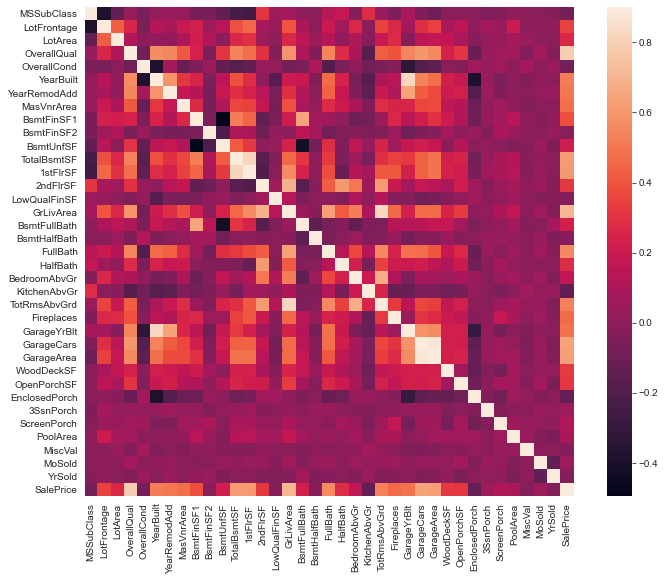

In [567]:


#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [568]:
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


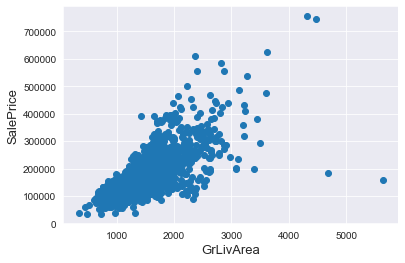

In [569]:
# Clean all outlier first 
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


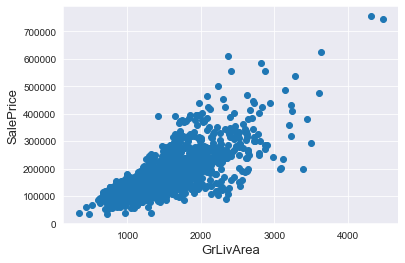

In [570]:
# Clean the outlier 
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

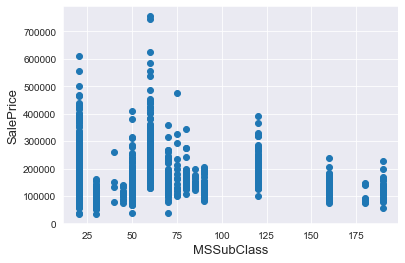

In [571]:
fig, ax = plt.subplots()
ax.scatter(x = train['MSSubClass'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('MSSubClass', fontsize=13)
plt.show()



In [572]:
# The data has little to no correlation to the sales
train.drop("MSSubClass", axis = 1, inplace = True)
test.drop("MSSubClass", axis = 1, inplace = True)

In [573]:
# This data is categorical, using frequency
df=pd.DataFrame({'data':train['MSZoning']})
count = df['data'].value_counts() 
print(count)
# Doesn't seem to be any strong outlier 

RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: data, dtype: int64


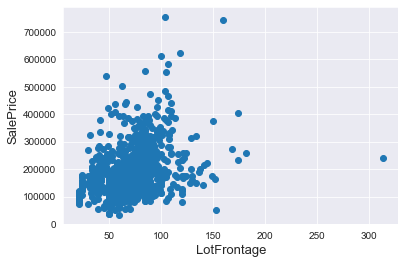

In [574]:
fig, ax = plt.subplots()
ax.scatter(x = train['LotFrontage'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotFrontage', fontsize=13)
plt.show()

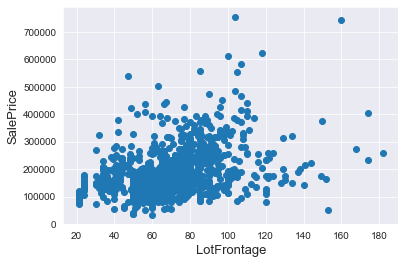

In [575]:
train = train.drop(train[(train['LotFrontage']>250)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['LotFrontage'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotFrontage', fontsize=13)
plt.show()

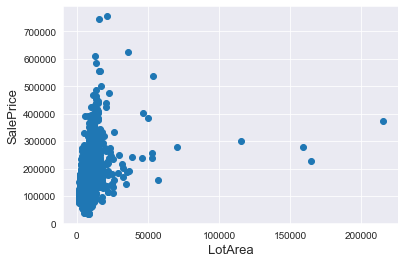

In [576]:
fig, ax = plt.subplots()
ax.scatter(x = train['LotArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()

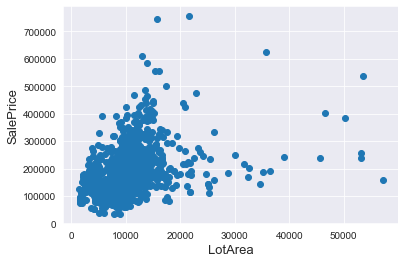

In [577]:
train = train.drop(train[(train['LotArea']>60000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['LotArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()

In [578]:
# This data is categorical, using frequency
df=pd.DataFrame({'data':train['Street']})
count = df['data'].value_counts() 
print(count)
# Doesn't seem to be any strong outlier, should i drop this column ? 

Pave    1447
Grvl       5
Name: data, dtype: int64


In [579]:
# This data is categorical, using frequency
df=pd.DataFrame({'data':train['Alley']})
count = df['data'].value_counts() 
print(count)
# Doesn't seem to be any strong outlier 


Grvl    50
Pave    41
Name: data, dtype: int64


In [580]:
# This data is categorical, using frequency
df=pd.DataFrame({'data':train['LotShape']})
count = df['data'].value_counts() 
print(count)


Reg    925
IR1    481
IR2     38
IR3      8
Name: data, dtype: int64


In [581]:
df=pd.DataFrame({'data':train['LandContour']})
count = df['data'].value_counts() 
print(count)

Lvl    1311
Bnk      61
HLS      48
Low      32
Name: data, dtype: int64


In [582]:
df=pd.DataFrame({'data':train['Utilities']})
count = df['data'].value_counts() 
print(count)

# Drop this column, too little information 
train.drop("Utilities", axis = 1, inplace = True)
test.drop("Utilities", axis = 1, inplace = True)

AllPub    1451
NoSeWa       1
Name: data, dtype: int64


In [583]:
df=pd.DataFrame({'data':train['LotConfig']})
count = df['data'].value_counts() 
print(count)



Inside     1048
Corner      261
CulDSac      92
FR2          47
FR3           4
Name: data, dtype: int64


In [584]:
# Drop some 
train = train.drop(train[(train['LotConfig']=="FR3")].index)

df=pd.DataFrame({'data':train['LotConfig']})
count = df['data'].value_counts() 
print(count)

Inside     1048
Corner      261
CulDSac      92
FR2          47
Name: data, dtype: int64


In [585]:
df=pd.DataFrame({'data':train['LandSlope']})
count = df['data'].value_counts() 
print(count)

Gtl    1376
Mod      63
Sev       9
Name: data, dtype: int64


In [586]:
df=pd.DataFrame({'data':train['Neighborhood']})
count = df['data'].value_counts() 
print(count)

NAmes      224
CollgCr    150
OldTown    113
Edwards     98
Somerst     85
Gilbert     79
NridgHt     75
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     57
Crawfor     51
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      36
ClearCr     25
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: data, dtype: int64


In [587]:
df=pd.DataFrame({'data':train['Condition1']})
count = df['data'].value_counts() 
print(count)

Norm      1252
Feedr       80
Artery      48
RRAn        26
PosN        18
RRAe        11
PosA         7
RRNn         4
RRNe         2
Name: data, dtype: int64


In [588]:
train = train.drop(train[(train['Condition1']=="RRNn") | (train['Condition1']=="RRNe")].index)

df=pd.DataFrame({'data':train['Condition1']})
count = df['data'].value_counts() 
print(count)

Norm      1252
Feedr       80
Artery      48
RRAn        26
PosN        18
RRAe        11
PosA         7
Name: data, dtype: int64


In [589]:
df=pd.DataFrame({'data':train['BldgType']})
count = df['data'].value_counts() 
print(count)

1Fam      1206
TwnhsE     112
Duplex      51
Twnhs       43
2fmCon      30
Name: data, dtype: int64


In [590]:
df=pd.DataFrame({'data':train['HouseStyle']})
count = df['data'].value_counts() 
print(count)

1Story    717
2Story    438
1.5Fin    152
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: data, dtype: int64


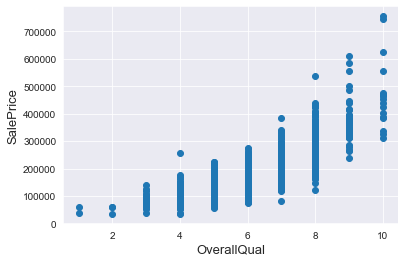

In [591]:
fig, ax = plt.subplots()
ax.scatter(x = train['OverallQual'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

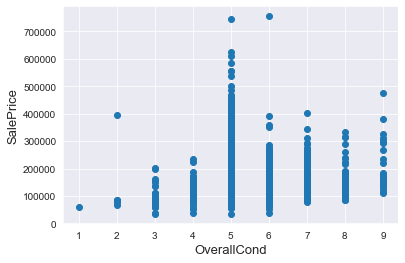

In [592]:
fig, ax = plt.subplots()
ax.scatter(x = train['OverallCond'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallCond', fontsize=13)
plt.show()

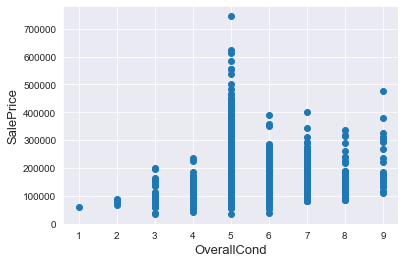

In [593]:
train = train.drop(train[(train['OverallCond']==2) & (train['SalePrice']>300000)].index)
train = train.drop(train[(train['OverallCond']==6) & (train['SalePrice']>600000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['OverallCond'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallCond', fontsize=13)
plt.show()

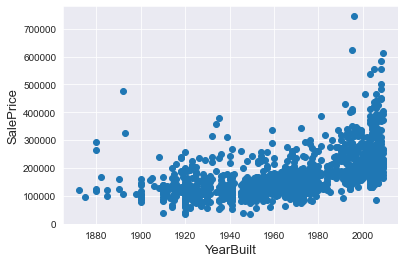

In [594]:
fig, ax = plt.subplots()
ax.scatter(train['YearBuilt'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearBuilt', fontsize=13)
plt.show()

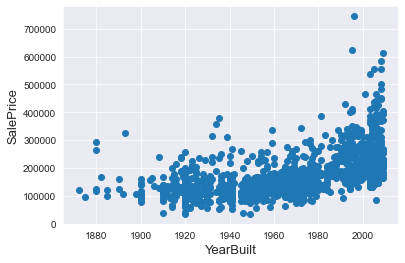

In [595]:
#Remove outlier
train = train.drop(train[(train['YearBuilt']<1900) & (train['SalePrice']>400000)].index)


#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['YearBuilt'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearBuilt', fontsize=13)
plt.show()

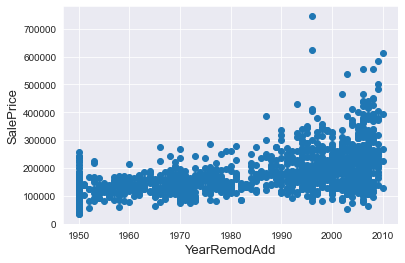

In [596]:
fig, ax = plt.subplots()
ax.scatter(train['YearRemodAdd'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearRemodAdd', fontsize=13)
plt.show()

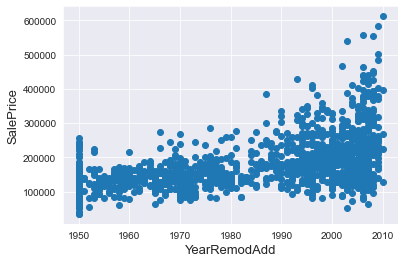

In [597]:
#Remove outlier
train = train.drop(train[(train['YearRemodAdd']<2000) & (train['SalePrice']>600000)].index)


#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['YearRemodAdd'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearRemodAdd', fontsize=13)
plt.show()

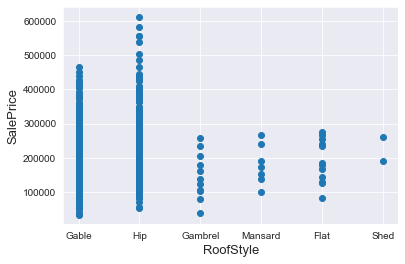

In [598]:
fig, ax = plt.subplots()
ax.scatter(train['RoofStyle'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('RoofStyle', fontsize=13)
plt.show()

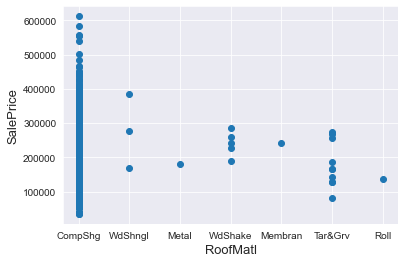

In [599]:
fig, ax = plt.subplots()
ax.scatter(train['RoofMatl'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('RoofMatl', fontsize=13)
plt.show()

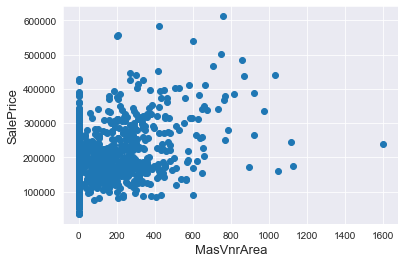

In [600]:

fig, ax = plt.subplots()
ax.scatter(train['MasVnrArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('MasVnrArea', fontsize=13)
plt.show()

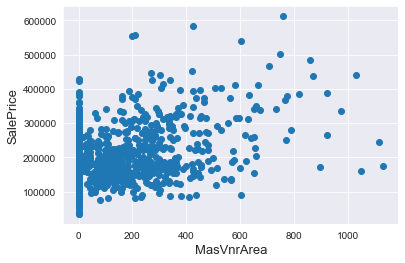

In [601]:
#Remove outlier
train = train.drop(train[(train['MasVnrArea']>1200)].index)


#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['MasVnrArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('MasVnrArea', fontsize=13)
plt.show()

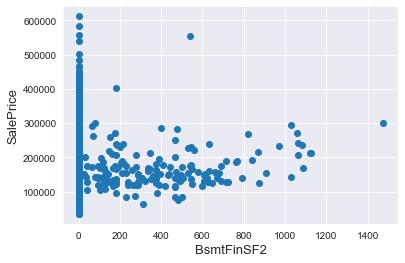

In [602]:
# Weird graph, not sure what to do about it
fig, ax = plt.subplots()
ax.scatter(train['BsmtFinSF2'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('BsmtFinSF2', fontsize=13)
plt.show()

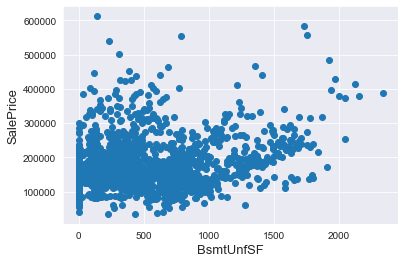

In [603]:
fig, ax = plt.subplots()
ax.scatter(train['BsmtUnfSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('BsmtUnfSF', fontsize=13)
plt.show()

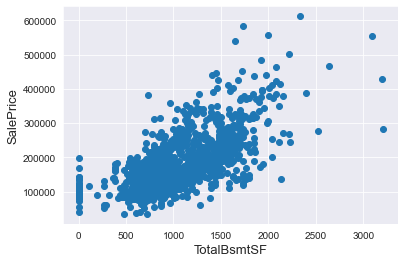

In [604]:
fig, ax = plt.subplots()
ax.scatter(train['TotalBsmtSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

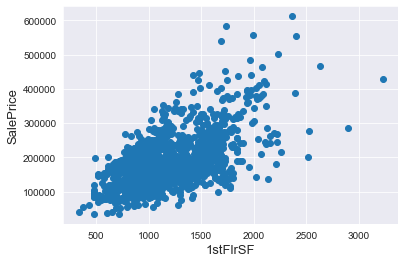

In [605]:
fig, ax = plt.subplots()
ax.scatter(train['1stFlrSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()

train = train.drop(train[(train['1stFlrSF']>3000)].index)

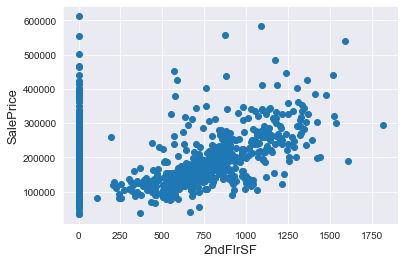

In [606]:
fig, ax = plt.subplots()
ax.scatter(train['2ndFlrSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('2ndFlrSF', fontsize=13)
plt.show()

# do I remove all the 0 here? seems like an outlier 

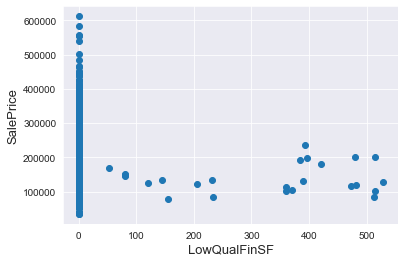

In [607]:
fig, ax = plt.subplots()
ax.scatter(train['LowQualFinSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LowQualFinSF', fontsize=13)
plt.show()

In [608]:
# Doesn't seem to have any correlation
train.drop("LowQualFinSF", axis = 1, inplace = True)
test.drop("LowQualFinSF", axis = 1, inplace = True)

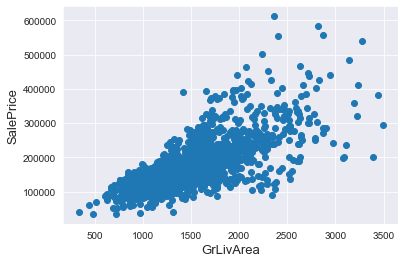

In [609]:
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

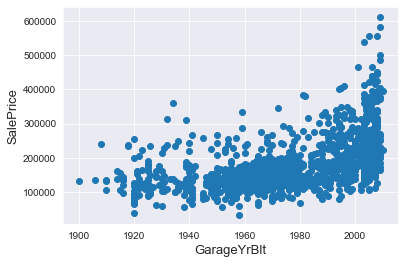

In [610]:
fig, ax = plt.subplots()
ax.scatter(train['GarageYrBlt'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageYrBlt', fontsize=13)
plt.show()

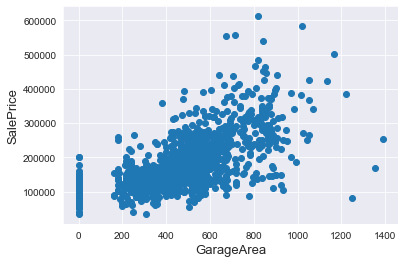

In [611]:
fig, ax = plt.subplots()
ax.scatter(train['GarageArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

train = train.drop(train[(train['GarageArea']>1200) & (train['SalePrice']<300000)].index)

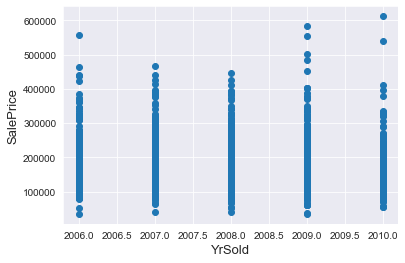

In [612]:
fig, ax = plt.subplots()
ax.scatter(train['YrSold'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YrSold', fontsize=13)
plt.show()


In [613]:
# Doesn't seem to have any correlation
train.drop("YrSold", axis = 1, inplace = True)
test.drop("YrSold", axis = 1, inplace = True)


 mu = 178617.40 and sigma = 74769.50



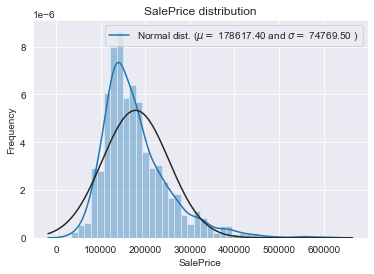

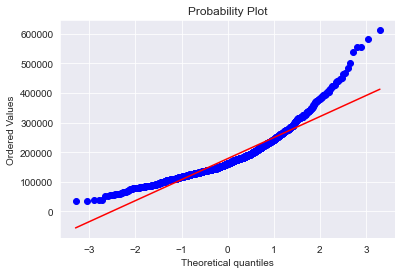

In [614]:
# Checking target variable - Analysis on sales variable 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [615]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [616]:
# This mark the beginning of the data preprocessing - fill missing value 

In [617]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# %matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from scipy import stats

In [618]:
# Already read and used a data to clean 
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

y_train = train.SalePrice.values

# Concatenate the training and the testing data together first
all_dat = pd.concat((train, test)).reset_index(drop=True)
all_dat.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_dat.shape))


all_data size is : (2891, 75)


In [619]:
# Find the ratio of the missing data 
all_na = (all_dat.isnull().sum() / len(all_dat)) * 100 
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending = False)
missing_dat = pd.DataFrame({'Missing ratio':all_na})
missing_dat.head(40)

Missing ratio
PoolQC               99.723
MiscFeature          96.472
Alley                93.186
Fence                80.353
FireplaceQu          48.910
LotFrontage          16.569
GarageYrBlt           5.500
GarageCond            5.500
GarageQual            5.500
GarageFinish          5.500
GarageType            5.431
BsmtCond              2.836
BsmtExposure          2.836
BsmtQual              2.802
BsmtFinType2          2.767
BsmtFinType1          2.733
MasVnrType            0.830
MasVnrArea            0.796
MSZoning              0.138
BsmtFullBath          0.069
BsmtHalfBath          0.069
Functional            0.069
Exterior2nd           0.035
Exterior1st           0.035
SaleType              0.035
BsmtFinSF1            0.035
BsmtFinSF2            0.035
BsmtUnfSF             0.035
TotalBsmtSF           0.035
KitchenQual           0.035
GarageCars            0.035
GarageArea            0.035
Electrical            0.035

In [620]:
# Now we fill all the missing data 

PoolQC: NA means no pool 

In [621]:
all_dat["PoolQC"] = all_dat["PoolQC"].fillna("none")

MiscFeature: Na means none 

In [622]:
all_dat["MiscFeature"] = all_dat["MiscFeature"].fillna("none")

Alley: NA means no alley access 

In [623]:
all_dat["Alley"] = all_dat["Alley"].fillna("none")

Fence: NA means no fence

In [624]:
all_dat["Fence"] = all_dat["Fence"].fillna("none")

FireplaceQu: NA means no fireplace 

In [625]:
all_dat["FireplaceQu"] = all_dat["FireplaceQu"].fillna("none")

LotFrontage: Can try to fill NA with the median of the same neighbourhood. Since the same neighbourhood tend to have the same street size 

In [626]:
all_dat["LotFrontage"] = all_dat.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)

Fill GarageFinish, GarageQual, GarageCond, GarageType with none since it means they have no garage

In [627]:
for i in ("GarageFinish", "GarageQual", "GarageCond", "GarageType"): 
    all_dat[i] = all_dat[i].fillna("none")

GarageYrBlt, GarageCars, GarageArea fill 0 for NA since there are no cars, no area. 

In [628]:
for i in ("GarageYrBlt", "GarageCars", "GarageArea"): 
    all_dat[i] = all_dat[i].fillna(0)

BsmtExposure, BsmtCond, BsmtQual, BsmtFinType1, BsmtFinType2 fill NA with none since it means no basement 

In [629]:
for i in ("BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType1", "BsmtFinType2"): 
    all_dat[i] = all_dat[i].fillna("none")

BsmtHalfBath, BsmtFullBath, TotalBsmtSF, BsmtUnfSF, BsmtFinSF2, BsmtFinSF1 values are likely to be 0 for no basement 

In [630]:
for i in ("BsmtHalfBath", "BsmtFullBath", "TotalBsmtSF", "BsmtUnfSF", "BsmtFinSF2", "BsmtFinSF1"): 
    all_dat[i] = all_dat[i].fillna(0)

MasVnrType and MasVnrArea can be replaced with none and 0 respectively for no masonry

In [631]:
all_dat["MasVnrType"] = all_dat["Fence"].fillna("none")
all_dat["MasVnrArea"] = all_dat["Fence"].fillna("none")

Can try to fill NA with RL since its the most frequent data in the MSZoning 

In [632]:
all_dat["MSZoning"] = all_dat["MSZoning"].fillna("RL")

Functional: Can assume NA as typical(Typ) according to the data description

In [633]:
all_dat["Functional"] = all_dat["Functional"].fillna("Typ")

Utilities is dropped in the cleaning outlier 

In [634]:
# Already dropped so no need to do this
# all_dat = all_dat.drop(['Utilities'], axis=1) 

SaleType: Fill NA with the most frequent data

In [635]:
all_dat["SaleType"] = all_dat["SaleType"].fillna(all_dat["SaleType"].mode()[0])

KitchenQual: Fill the the most frequent data

In [636]:
all_dat["KitchenQual"] = all_dat["KitchenQual"].fillna(all_dat["KitchenQual"].mode()[0])

Electrical: Fill with the most frequent data 

In [637]:
all_dat["Electrical"] = all_dat["Electrical"].fillna(all_dat["Electrical"].mode()[0])

Same case with both Exterior1st and 2nd, fill with the most frequent data 

In [638]:
all_dat["Exterior1st"] = all_dat["Exterior1st"].fillna(all_dat["Exterior1st"].mode()[0])
all_dat["Exterior2nd"] = all_dat["Exterior2nd"].fillna(all_dat["Exterior2nd"].mode()[0])

In [639]:
# Check again to confirm that there is no more missing value 
all_na = (all_dat.isnull().sum() / len(all_dat)) * 100 
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending = False)
missing_dat = pd.DataFrame({'Missing ratio':all_na})
missing_dat.head(40)

Empty DataFrame
Columns: [Missing ratio]
Index: []

Filling missing value is done 

Fix skew 

In [640]:
numeric = all_dat.dtypes[all_dat.dtypes != "object"].index

# Check the skew of all numerical features
skewed_features = all_dat[numeric].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(60)


Skew in numerical features: 



Skew
MiscVal       21.874
PoolArea      18.624
3SsnPorch     11.740
KitchenAbvGr   4.278
BsmtFinSF2     4.158
EnclosedPorch  4.000
BsmtHalfBath   3.938
ScreenPorch    3.926
LotArea        3.318
OpenPorchSF    2.534
WoodDeckSF     1.854
1stFlrSF       1.239
BsmtFinSF1     0.984
GrLivArea      0.954
BsmtUnfSF      0.908
2ndFlrSF       0.836
TotRmsAbvGrd   0.749
Fireplaces     0.732
HalfBath       0.700
TotalBsmtSF    0.635
BsmtFullBath   0.623
LotFrontage    0.610
OverallCond    0.572
BedroomAbvGr   0.333
MoSold         0.197
OverallQual    0.180
GarageArea     0.172
FullBath       0.164
GarageCars    -0.221
YearRemodAdd  -0.444
YearBuilt     -0.594
GarageYrBlt   -3.884

In [641]:
skewness = skewness[abs(skewness) > 0.75]
print("There are", skewness.shape[0], "skewed numerical features to Box Cox transform")

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for i in skewed_features:
    all_dat[i] = boxcox1p(all_dat[i], lam)

There are 32 skewed numerical features to Box Cox transform


In [642]:


all_dat = pd.get_dummies(all_dat)
n_train = train.shape[0]
n_test = test.shape[0]
train = all_dat[:n_train]
test = all_dat[n_train:]


In [643]:
print(train.shape)
print(test.shape)
print(y_train.shape)
# y_train = y_train.reshape((y_train.shape[0], 1))

(1432, 301)
(1459, 301)
(1432,)


In [644]:
# # As you can see, due to the get_dummies, the column is now imbalanced 
# # Get missing columns in the training test
# missing_columns = set( train.columns ) - set( test.columns )
# # Add a missing column in test set with default value equal to 0
# for i in missing_columns:
#     test[i] = 0
# # Ensure the order of column in the test set is in the same order than in train set
# test = test[train.columns]

In [645]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

## increase n_folds if model is undersetimation, vice versa
n_folds = 5

def crossval(model):
    kf=KFold(n_folds,shuffle = True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=42))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=42))
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =42)

model_xgb = xgb.XGBRegressor(learning_rate=0.05, max_depth=3)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05)



In [646]:
score = crossval(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1103 (0.0070)



In [647]:
score = crossval(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ElasticNet score: 0.1103 (0.0071)



In [648]:
score = crossval(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1146 (0.0081)



In [649]:
score = crossval(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1320 (0.0065)



In [650]:
score = crossval(model_xgb)
print("XGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

XGBM score: 0.1525 (0.0054)



In [651]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test))
print(rmsle(y_train, lgb_train_pred))


0.11290401849231897


In [652]:

model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.1296272301921925


In [653]:
chosenmodel = lgb_pred
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = chosenmodel
submission.to_csv('submission.csv',index=False)

In [654]:
chosenmodel = xgb_pred
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = chosenmodel
submission.to_csv('submission_xgb.csv',index=False)